In [1]:
import pandas as pd 
import numpy as np 
import os
import csv

In [3]:
sample = pd.read_csv('input.csv').to_numpy()
sample.shape

(1422, 100)

In [6]:
with open('/home/neuronS1/NRC/m01_s01_e01_positions.txt', 'r') as f:
    sample = f.read()

len(sample)

46157

In [2]:
import GCN
from GCN import data_processing
from GCN.data_processing import  *

In [ ]:
dataLoader = Data_Loader(dir="..")

In [1]:
len(dataLoader.scaled_x[0][0][0][0])

NameError: name 'dataLoader' is not defined

In [ ]:
import torch
from torch import nn

In [12]:
input = torch.randn(1, 100, 25, 3).permute(0, 3, 1, 2)
input.shape

torch.Size([1, 3, 100, 25])

In [13]:
m = nn.Conv2d(3, 64, (9,1)) # _,_,25,3

output = m(input)
output.shape

torch.Size([1, 64, 92, 25])

In [17]:
d = output.unsqueeze(1)
d.shape

torch.Size([1, 1, 64, 92, 25])

In [18]:
input = torch.randn(1, 48, 100, 25)

In [23]:
i2 = torch.reshape(input, (-1, input.shape[0], input.shape[1]*input.shape[-1]))
i2.shape

torch.Size([100, 1, 1200])

In [25]:
rec = nn.LSTM(1200,80)
o, _= rec(i2)
o.shape

torch.Size([100, 1, 80])

In [1]:
%cd ..
import my_rehab.sgcn_lstm
from my_rehab.sgcn_lstm import *
from my_rehab.data_processing import Data_set
from my_rehab.graph import Graph
from torch.utils.data import DataLoader
data_set = Data_set('')
graph = Graph(len(data_set.body_part))
traindataset = DataLoader(data_set, batch_size=1)
model = traincell(AD=graph.AD, AD2=graph.AD2, bias_mat_1=graph.bias_mat_1, bias_mat_2=graph.bias_mat_2)

/home/neuronS1/NRC


/home/neuronS1/anaconda3/envs/NRC/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
bparts = data_set.body_parts()

In [2]:
data_set.train_x.shape

(1664, 101)

In [3]:
aframe = data_set.__getitem__(0)[0]
aframe.shape

(100, 25, 3)

In [9]:
aframe.shape()

TypeError: 'tuple' object is not callable

In [5]:
neighbor_1base = [(1, 2), (2, 21), (3, 21), (4, 3), (5, 21),
                                      (6, 5), (7, 6), (8, 7), (9, 21), (10, 9),
                                      (11, 10), (12, 11), (13, 1), (14, 13), (15, 14),
                                      (16, 15), (17, 1), (18, 17), (19, 18), (20, 19),
                                      (22, 23), (23, 8), (24, 25), (25, 12)]

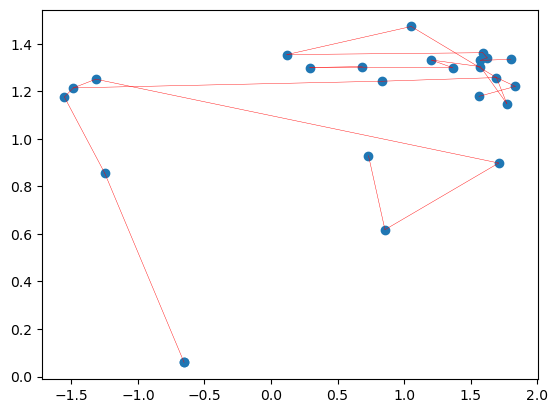

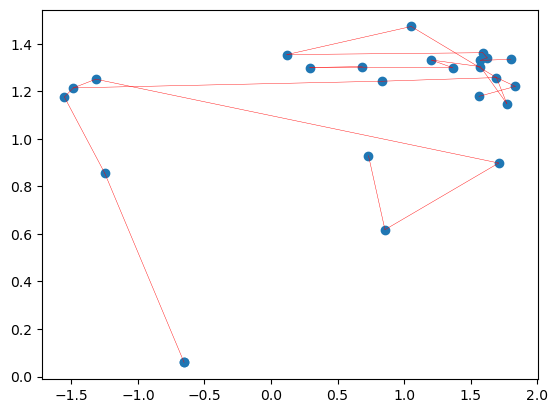

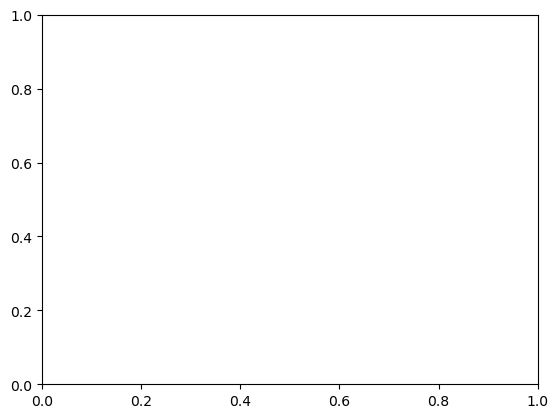

In [4]:
import matplotlib.pyplot as plt
from IPython import display
import copy

plt.plot()
for idx2, i in enumerate(aframe):#frame
        plt.scatter(i[:,0], i[:,1])
        for l in neighbor_1base:
                plt.plot([i[l[0]-1, 0],i[l[1]-1, 0]], [i[l[0]-1,1],i[l[1]-1,1]], color="red", linewidth=0.3)

        # plt.gca().invert_xaxis()
        # plt.gca().invert_yaxis()
        display.clear_output(wait=True)
        display.display(plt.gcf())
        # plt.axis('off')
        plt.show()
        # plt.savefig(savename, bbox_inches='tight', pad_inches=0)
        plt.cla()

In [22]:
body_parts = ['index_Spine_Base', 'index_Spine_Mid', 'index_Neck', 'index_Head', 'index_Shoulder_Left', 
                      'index_Elbow_Left', 'index_Wrist_Left', 'index_Hand_Left', 'index_Shoulder_Right', 'index_Elbow_Right', 
                      'index_Wrist_Right', 'index_Hand_Right', 'index_Hip_Left', 
                      
                      
                      
                      
                      'index_Knee_Left', 'index_Ankle_Left', 
                     'index_Foot_Left', 'index_Hip_Right', 'index_Knee_Right', 'index_Ankle_Right', 'index_Ankle_Right', 'index_Spine_Shoulder', 
                      'index_Tip_Left', 'index_Thumb_Left', 'index_Tip_Right', 'index_Thumb_Right'
                      ]

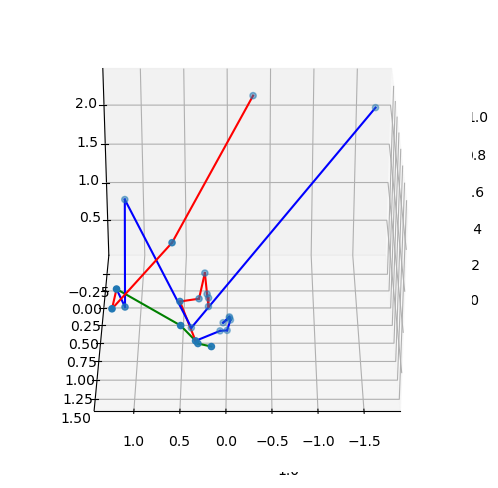

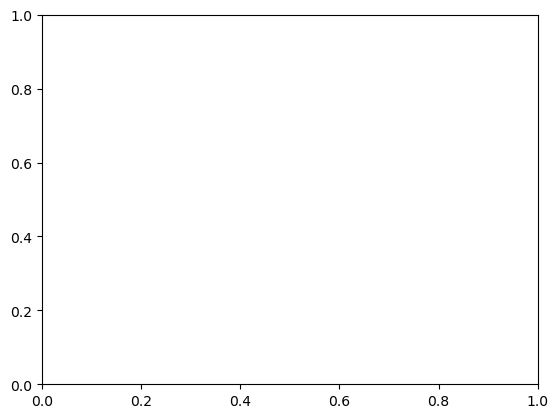

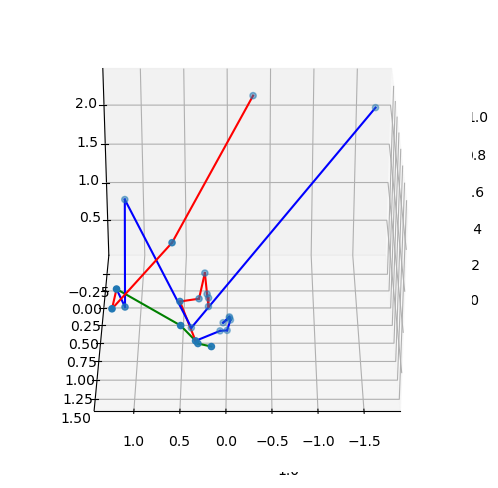

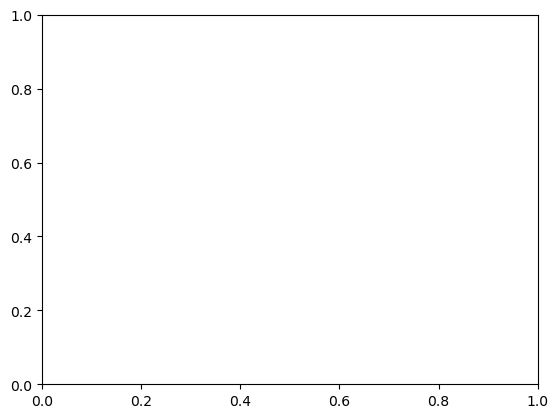

In [27]:
import matplotlib.pyplot as plt
from IPython import display
import copy

for i in aframe:
        fig = plt.figure(figsize=(6, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(i[:25,0], i[:25,1], i[:25,2])

        for l in neighbor_1base:
                side = body_parts[l[0]-1]
                side = side.split('_')[-1]
                if side == 'Left':
                        color = 'blue'
                elif side == 'Right':
                        color = 'red'
                else:
                        color = 'green'
                ax.plot([i[l[0]-1, 0],i[l[1]-1, 0]], [i[l[0]-1,1],i[l[1]-1,1]], [i[l[0]-1,2], i[l[1]-1,2]], c=color)

        ax.view_init(30,90)
        display.clear_output(wait=True)
        display.display(plt.gcf())
        plt.show()
        plt.cla()

In [5]:
for x, y in traindataset:
    x = x.type(torch.float32)
    pred= model(x)
    print(y)

tensor([[0.]], dtype=torch.float64)


/home/neuronS1/anaconda3/envs/NRC/lib/python3.7/site-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [3]:
import torch.nn

coefs = torch.randn(1,25,100,25)
input= torch.randn(1,64,100,25)
gcn_x1 = torch.einsum('nwtv,nctw->nctv', coefs, input)

In [7]:
gcn_x1.shape

torch.Size([1, 64, 100, 25])

In [8]:
gcn_1 = torch.cat([gcn_x1,gcn_x1], dim = 1)

In [4]:
z1= torch.randn(1,16,100,25)
z2= torch.randn(1,16,100,25)
z3= torch.randn(1,16,100,25)
z = torch.cat([z1, z2, z3], dim=1)

z.shape

torch.Size([1, 48, 100, 25])

In [7]:
z1= torch.randn(1,16,100)

In [14]:
m = nn.LSTM(100,16, dropout=0.25)
out = m(z1)
out

/home/neuronS1/anaconda3/envs/NRC/lib/python3.7/site-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


(tensor([[[-2.5878e-01,  3.5485e-01, -4.9544e-02, -4.6295e-02,  5.0575e-03,
            5.8007e-02,  1.6066e-02,  8.1385e-02,  4.9593e-01,  8.3542e-03,
            3.8527e-02, -1.4331e-01,  2.5418e-01,  2.6472e-01,  2.7563e-01,
            2.6350e-01],
          [ 1.0285e-02,  3.7092e-02,  2.9077e-01,  1.6591e-01, -4.9146e-02,
           -8.6165e-02,  8.2993e-02, -2.5712e-01, -3.9181e-01,  8.2316e-02,
           -3.2846e-01, -2.1815e-01, -2.5724e-01,  2.7184e-02,  6.1570e-02,
            7.9650e-02],
          [ 1.4885e-02, -2.6797e-01,  6.0933e-02, -1.6273e-01, -1.4579e-01,
           -1.2207e-01, -1.5850e-01, -2.9698e-01, -3.1195e-01,  5.0330e-02,
           -5.0682e-01,  1.4550e-01, -7.7284e-03, -4.6594e-02,  1.0563e-01,
            1.3436e-01],
          [ 8.5753e-02, -2.8522e-01, -5.0550e-01, -2.2230e-01, -3.2307e-01,
           -5.1966e-02,  2.0719e-01, -1.4600e-01,  1.0524e-01,  1.7839e-01,
           -2.6957e-01, -5.8969e-01, -1.7244e-01, -3.3893e-02, -1.5828e-02,
           -3